# 1. Découverte des données

## 1.1 Installation des Packages

In [1]:
pip install requests 

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install lxml 

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install selenium 

Note: you may need to restart the kernel to use updated packages.


* requests est un package servant à récupérer les données d'un site web
* lxml est un package servant à télécharger des fichiers lxml
* selenium est un package servant à l'interaction automatisée avec un serveur

## 1.2 Importation des Librairies

In [3]:
import lxml
import selenium
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
sns.set(rc={'figure.figsize':(20,10)})
sns.set_theme()


/Users/idrisskadiri/opt/anaconda3/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


## 1.3 Création d'une première base "Races"

* Récupération des données à partir d'une API en ligne : "ergast.com"
* Objectif : création d'une base "Races" regroupant les années des saisons, le nom et le rang du circuit dans la saison, la latitude et la longitude du circuit (utile plus tard pour les représentations géographiques), le pays et la date du circuit, ainsi que l'url wikipédia associé
* La base contient 550 lignes correspondant aux saisons comprises entre 1990 et 2020

In [9]:
races = {'season': [],
        'round': [],
        'circuit_id': [],
        'lat': [],
        'long': [],
        'country': [],
        'date': [],
        'url': []}

for year in list(range(1990,2021)):
    
    url = 'https://ergast.com/api/f1/{}.json'
    r = requests.get(url.format(year))
    json = r.json()

    for item in json['MRData']['RaceTable']['Races']:
        try:
            races['season'].append(int(item['season']))
        except:
            races['season'].append(None)

        try:
            races['round'].append(int(item['round']))
        except:
            races['round'].append(None)

        try:
            races['circuit_id'].append(item['Circuit']['circuitId'])
        except:
            races['circuit_id'].append(None)

        try:
            races['lat'].append(float(item['Circuit']['Location']['lat']))
        except:
            races['lat'].append(None)

        try:
            races['long'].append(float(item['Circuit']['Location']['long']))
        except:
            races['long'].append(None)

        try:
            races['country'].append(item['Circuit']['Location']['country'])
        except:
            races['country'].append(None)

        try:
            races['date'].append(item['date'])
        except:
            races['date'].append(None)

        try:
            races['url'].append(item['url'])
        except:
            races['url'].append(None)
        
race= pd.DataFrame(races)

In [10]:
race

,season,round,circuit_id,lat,long,country,date,url
0,1990,1,phoenix,33.4479,-112.07500,USA,1990-03-11,http://en.wikipedia.org/wiki/1990_United_State...
1,1990,2,interlagos,-23.7036,-46.69970,Brazil,1990-03-25,http://en.wikipedia.org/wiki/1990_Brazilian_Gr...
2,1990,3,imola,44.3439,11.71670,Italy,1990-05-13,http://en.wikipedia.org/wiki/1990_San_Marino_G...
3,1990,4,monaco,43.7347,7.42056,Monaco,1990-05-27,http://en.wikipedia.org/wiki/1990_Monaco_Grand...
4,1990,5,villeneuve,45.5000,-73.52280,Canada,1990-06-10,http://en.wikipedia.org/wiki/1990_Canadian_Gra...
...,...,...,...,...,...,...,...,...
546,2020,13,imola,44.3439,11.71670,Italy,2020-11-01,https://en.wikipedia.org/wiki/2020_Emilia_Roma...
547,2020,14,istanbul,40.9517,29.40500,Turkey,2020-11-15,https://en.wikipedia.org/wiki/2020_Turkish_Gra...
548,2020,15,bahrain,26.0325,50.51060,Bahrain,2020-11-29,https://en.wikipedia.org/wiki/2020_Bahrain_Gra...
549,2020,16,bahrain,26.0325,50.51060,Bahrain,2020-12-06,https://en.wikipedia.org/wiki/2020_Sakhir_Gran...


In [11]:
race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      551 non-null    int64  
 1   round       551 non-null    int64  
 2   circuit_id  551 non-null    object 
 3   lat         551 non-null    float64
 4   long        551 non-null    float64
 5   country     551 non-null    object 
 6   date        551 non-null    object 
 7   url         551 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 34.6+ KB


## 1.4 Création d'une deuxième base "Results"

* Objectif : création d'une deuxième base incluant notamment la position sur la grille de départ et le podium final
* Observations de valeurs manquantes sur la variable "time" : on choisit donc de l'exclure (64% de valeurs manquantes)

In [6]:
rounds = []
for year in np.array(race.season.unique()):
    rounds.append([year, list(race[race.season == year]['round'])])

print(rounds)
# query API
    
results = {'season': [],
          'round':[],
           'circuit_id':[],
          'driver': [],
           'date_of_birth': [],
           'nationality': [],
          'constructor': [],
          'grid': [],
          'time': [],
          'status': [],
          'points': [],
          'podium': []}

for n in list(range(len(rounds))):
    for i in rounds[n][1]:
    
        url = 'http://ergast.com/api/f1/{}/{}/results.json'
        r = requests.get(url.format(rounds[n][0], i))
        json = r.json()

        for item in json['MRData']['RaceTable']['Races'][0]['Results']:
            try:
                results['season'].append(int(json['MRData']['RaceTable']['Races'][0]['season']))
            except:
                results['season'].append(None)

            try:
                results['round'].append(int(json['MRData']['RaceTable']['Races'][0]['round']))
            except:
                results['round'].append(None)

            try:
                results['circuit_id'].append(json['MRData']['RaceTable']['Races'][0]['Circuit']['circuitId'])
            except:
                results['circuit_id'].append(None)

            try:
                results['driver'].append(item['Driver']['driverId'])
            except:
                results['driver'].append(None)
            
            try:
                results['date_of_birth'].append(item['Driver']['dateOfBirth'])
            except:
                results['date_of_birth'].append(None)
                
            try:
                results['nationality'].append(item['Driver']['nationality'])
            except:
                results['nationality'].append(None)

            try:
                results['constructor'].append(item['Constructor']['constructorId'])
            except:
                results['constructor'].append(None)

            try:
                results['grid'].append(int(item['grid']))
            except:
                results['grid'].append(None)

            try:
                results['time'].append(int(item['Time']['millis']))
            except:
                results['time'].append(None)

            try:
                results['status'].append(item['status'])
            except:
                results['status'].append(None)

            try:
                results['points'].append(int(item['points']))
            except:
                results['points'].append(None)

            try:
                results['podium'].append(int(item['position']))
            except:
                results['podium'].append(None)

           
results = pd.DataFrame(results)

[[1990, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]], [1991, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]], [1992, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]], [1993, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]], [1994, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]], [1995, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]], [1996, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]], [1997, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]], [1998, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]], [1999, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]], [2000, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]], [2001, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]], [2002, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]], [2003, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]], [2004, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18

In [13]:
results

,season,round,circuit_id,driver,date_of_birth,nationality,constructor,grid,time,status,points,podium
0,1990,1,phoenix,senna,1960-03-21,Brazilian,mclaren,5,6752829.0,Finished,9.0,1
1,1990,1,phoenix,alesi,1964-06-11,French,tyrrell,4,6761514.0,Finished,6.0,2
2,1990,1,phoenix,boutsen,1957-07-13,Belgian,williams,9,6806909.0,Finished,4.0,3
3,1990,1,phoenix,piquet,1952-08-17,Brazilian,benetton,6,6821187.0,Finished,3.0,4
4,1990,1,phoenix,modena,1963-05-12,Italian,brabham,10,6822332.0,Finished,2.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
12392,2020,17,yas_marina,giovinazzi,1993-12-14,Italian,alfa,14,NaN,+1 Lap,0.0,16
12393,2020,17,yas_marina,latifi,1995-06-29,Canadian,williams,18,NaN,+1 Lap,0.0,17
12394,2020,17,yas_marina,kevin_magnussen,1992-10-05,Danish,haas,20,NaN,+1 Lap,0.0,18
12395,2020,17,yas_marina,pietro_fittipaldi,1996-06-25,Brazilian,haas,17,NaN,+2 Laps,0.0,19


In [14]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12397 entries, 0 to 12396
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         12397 non-null  int64  
 1   round          12397 non-null  int64  
 2   circuit_id     12397 non-null  object 
 3   driver         12397 non-null  object 
 4   date_of_birth  12397 non-null  object 
 5   nationality    12397 non-null  object 
 6   constructor    12397 non-null  object 
 7   grid           12397 non-null  int64  
 8   time           4464 non-null   float64
 9   status         12397 non-null  object 
 10  points         12392 non-null  float64
 11  podium         12397 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 1.1+ MB


## 1.7 Création de la base "weather" 

In [11]:
from selenium import webdriver

weather = race.iloc[:,[0,1,2]]

info = []

# read wikipedia tables

for link in race.url:
    try:
        df = pd.read_html(link)[0]
        if 'Weather' in list(df.iloc[:,0]):
            n = list(df.iloc[:,0]).index('Weather')
            info.append(df.iloc[n,1])
        else:
            df = pd.read_html(link)[1]
            if 'Weather' in list(df.iloc[:,0]):
                n = list(df.iloc[:,0]).index('Weather')
                info.append(df.iloc[n,1])
            else:
                df = pd.read_html(link)[2]
                if 'Weather' in list(df.iloc[:,0]):
                    n = list(df.iloc[:,0]).index('Weather')
                    info.append(df.iloc[n,1])
                else:
                    df = pd.read_html(link)[3]
                    if 'Weather' in list(df.iloc[:,0]):
                        n = list(df.iloc[:,0]).index('Weather')
                        info.append(df.iloc[n,1])
                    else:
                        driver = webdriver.Chrome()
                        driver.get(link)

                        # click language button
                        button = driver.find_element_by_link_text('Français')
                        button.click()
                        
                        # find weather in italian with selenium
                        
                        clima = driver.find_element_by_xpath('//*[@id="mw-content-text"]/div/table[1]/tbody/tr[9]/td').text
                        info.append(clima) 
                                
    except:
        info.append('not found')

# append column with weather information to dataframe  
  
weather['weather'] = info

# set up a dictionary to convert weather information into keywords

weather_dict = {'weather_warm': ['clair', 'clear', 'warm', 'hot', 'sunny', 'fine', 'mild', 'dégagé'],
               'weather_cold': ['cold', 'fresh', 'chilly', 'cool'],
               'weather_dry': ['dry', 'humide'],
               'weather_wet': ['showers', 'wet', 'rain', 'pluvieux', 'damp', 'thunderstorms', 'rainy'],
               'weather_cloudy': ['overcast', 'nuageux', 'clouds', 'cloudy', 'grey', 'gris']}

# map new df according to weather dictionary

weather_df = pd.DataFrame(columns = weather_dict.keys())
for col in weather_df:
    weather_df[col] = weather['weather'].map(lambda x: 1 if any(i in weather_dict[col] for i in x.lower().split()) else 0)
   
weather_info = pd.concat([weather, weather_df], axis = 1)

<ipython-input-11-dc7de05a27bc>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['weather'] = info


In [8]:
weather_info

,season,round,circuit_id,weather,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy
0,2020,1,red_bull_ring,Sunny,1,0,0,0,0
1,2020,2,red_bull_ring,Sunny,1,0,0,0,0
2,2020,3,hungaroring,"Wet at start, partly cloudy",0,0,0,1,1
3,2020,4,silverstone,Partly cloudy,0,0,0,0,1
4,2020,5,silverstone,Sunny,1,0,0,0,0
5,2020,6,catalunya,Partly cloudy,0,0,0,0,1
6,2020,7,spa,Partly cloudy,0,0,0,0,1
7,2020,8,monza,Sunny,1,0,0,0,0
8,2020,9,mugello,Sunny,1,0,0,0,0
9,2020,10,sochi,Sunny,1,0,0,0,0


## 1.6 Nettoyage d'une colonne aux données manquantes

In [ ]:
results_na=results.copy()
sns.heatmap(results_na.isna()) # On visualise l'emplacements des valeurs manquantes On a bcp de valeurs manquantes et un peu partout
results_na.isna()['time'].mean() # 64% de valeurs manquantes on ne va donc pas utilise

In [16]:
results=results.drop(labels='time', axis=1) #suppression de la colonne aux données manquantes

In [17]:
results

,season,round,circuit_id,driver,date_of_birth,nationality,constructor,grid,status,points,podium
0,1990,1,phoenix,senna,1960-03-21,Brazilian,mclaren,5,Finished,9.0,1
1,1990,1,phoenix,alesi,1964-06-11,French,tyrrell,4,Finished,6.0,2
2,1990,1,phoenix,boutsen,1957-07-13,Belgian,williams,9,Finished,4.0,3
3,1990,1,phoenix,piquet,1952-08-17,Brazilian,benetton,6,Finished,3.0,4
4,1990,1,phoenix,modena,1963-05-12,Italian,brabham,10,Finished,2.0,5
...,...,...,...,...,...,...,...,...,...,...,...
12392,2020,17,yas_marina,giovinazzi,1993-12-14,Italian,alfa,14,+1 Lap,0.0,16
12393,2020,17,yas_marina,latifi,1995-06-29,Canadian,williams,18,+1 Lap,0.0,17
12394,2020,17,yas_marina,kevin_magnussen,1992-10-05,Danish,haas,20,+1 Lap,0.0,18
12395,2020,17,yas_marina,pietro_fittipaldi,1996-06-25,Brazilian,haas,17,+2 Laps,0.0,19


# 2. Corrélation entre la Grille de départ et le classement d'arrivée

## 2.1 Première étude de corrélation

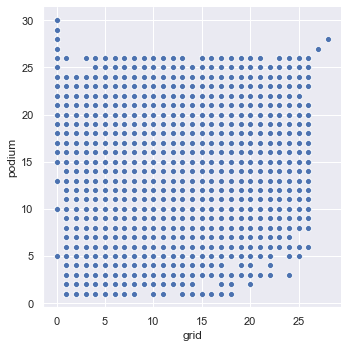

In [18]:
sns.relplot(x="grid", y="podium", data=results)

* Commentaires : A première vue, il n'y a pas de corrélations claires entre la position initiale sur la grille et la position d'arrivée

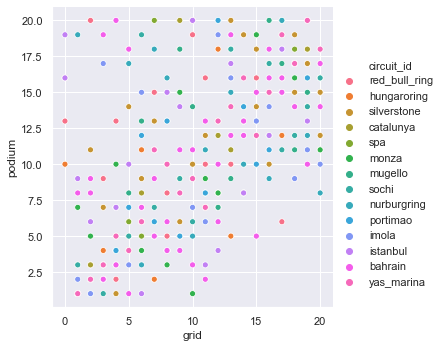

In [19]:
results_2010=results.copy()
results_2010=results_2010[results_2010["season"]>=2010]
sns.relplot(x="grid", y="podium", data=results_2010[results_2010["season"]==2020],hue="circuit_id")

* Nous restreignons l'étude à l'année l'étude du lien pôle entre la postion initiale et la position d'arrivée par circuit en 2010
* On n'observe pas une corrélation encore très franche, mais une tendance se dessine

## 2.2 Création d'une fonction de corrélation entre la grille et le podium

In [20]:
 def corr_grid_podium(annee):
    
    circuits=results_2010[results_2010["season"] ==annee]["circuit_id"].unique()
    df=results_2010[results_2010["season"] ==annee]
    les_correlations={}

    for circuit in circuits:
        df1=df[df["circuit_id"]==circuit][['grid',"podium"]]
        corr=df1.corr()["podium"][0]
        les_correlations[circuit]=corr
    
    df2=pd.DataFrame(list(les_correlations.items()),
                   columns=['circuit_id', 'correlation_grid_pod'])
    df2=df2.sort_values(by='correlation_grid_pod',ascending=False)

    print(df2)

    _,(ax1) = plt.subplots(ncols=1)
    sns.barplot(data=df2, x='circuit_id', y='correlation_grid_pod', ax=ax1, palette=sns.color_palette("icefire"))
    

        circuit_id  correlation_grid_pod
7           ricard              0.851128
5           monaco              0.846617
14      marina_bay              0.840602
11     hungaroring              0.803008
4        catalunya              0.775940
17       rodriguez              0.762406
0      albert_park              0.718797
2         shanghai              0.711278
9      silverstone              0.684211
20      yas_marina              0.664662
1          bahrain              0.622556
18        americas              0.590977
6       villeneuve              0.575940
8    red_bull_ring              0.544361
15           sochi              0.535338
16          suzuka              0.503759
3              BAK              0.354306
13           monza              0.324812
12             spa              0.231579
19      interlagos              0.129323
10  hockenheimring             -0.073684
None


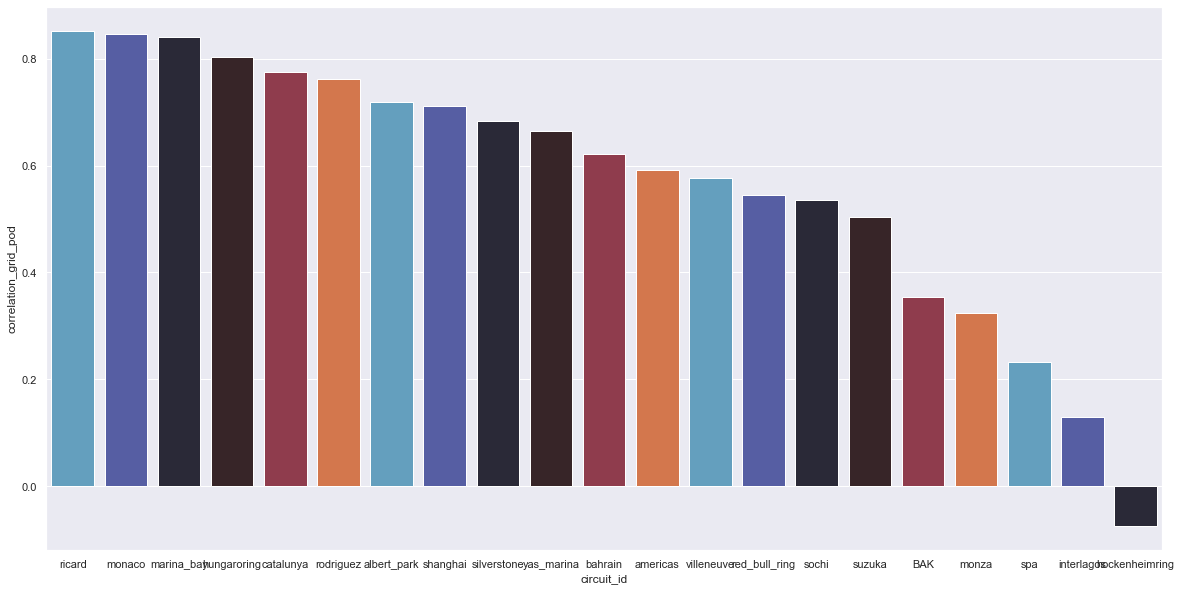

In [21]:
print(corr_grid_podium(2019))

* Observations : On observe une corrélation proche de 0.84 (proche de 1) pour le circuit de Monaco, ce qui est cohérent car les rues sont très étroites pour effectuer un dépassement. Au contraire, il est très facile de manoeuvrer sur le circuit de SPa, d'où une corrélation bien plus faible.

# 3. Corrélation entre le constructeur et les classemements sur la grille et à l'arrivée

## 3.1 Position Moyenne des constructeurs sur la grille et à l'arrivée

In [22]:
results_constructeur=results.copy()
results_constructeur=results_constructeur[["constructor","podium","grid"]]

In [23]:
results_constructeur.groupby("constructor").mean().sort_values(by="podium",ascending=True)

,podium,grid
constructor,,
brawn,4.882353,5.117647
mercedes,5.769767,4.611628
ferrari,7.433757,5.715971
red_bull,7.996711,6.980263
bmw_sauber,8.921429,8.935714
mclaren,9.269510,7.372051
benetton,9.543367,8.571429
renault,10.467626,9.989209
racing_point,10.631579,11.315789


* Observations : Comme l'on pouvait le prévoir, les constructeurs Mercedes, Ferrari et RedBull ont la meilleure moyenne en terme de position initiale et de place à l'arrivée

## 3.2 Pourcentage de courses gagnées par constructeur depuis 1990

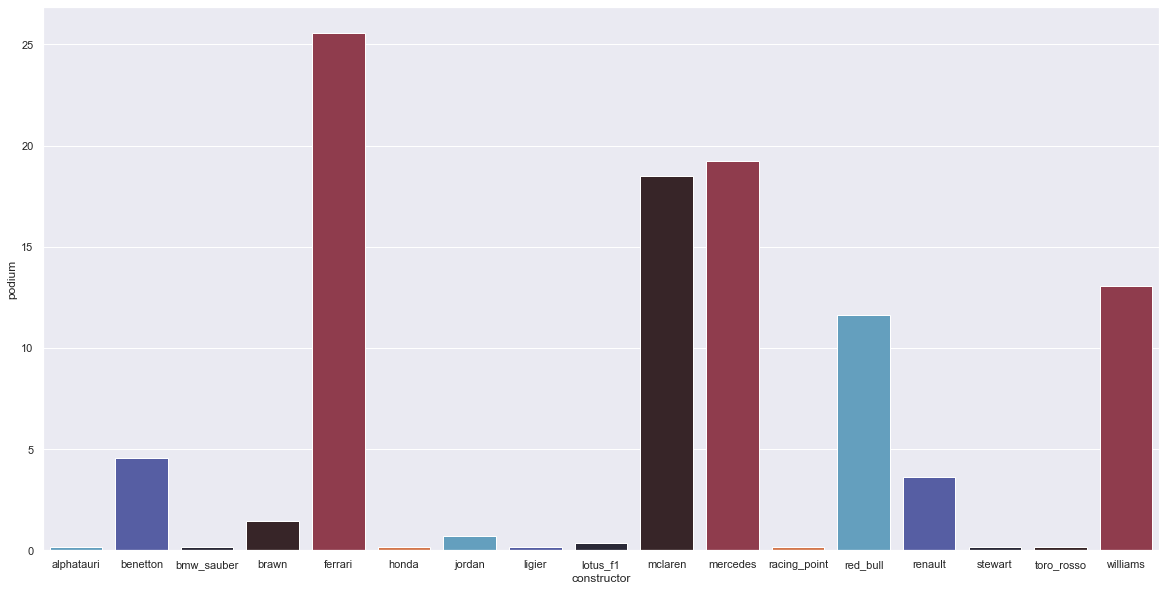

In [24]:
results_constructeur_1=results_constructeur.copy()
results_constructeur_1=results_constructeur_1[results_constructeur_1["podium"]==1]
df=(results_constructeur_1.groupby("constructor").count())/len(results_constructeur_1)*100
df=df.reset_index()
_,(ax1) = plt.subplots(ncols=1)
sns.barplot(data=df, x='constructor', y='podium', ax=ax1, palette=sns.color_palette("icefire"))

* Observations : là encore, sans grande surprise, des constructeurs sortent du lot, comme Ferrari, McLaren, et Mercedes

# 4. Corrélation entre la nationalité du pilote et le pourcentage de victoires

In [25]:
results_nationality=results.copy()
results_nationality=results_nationality[["nationality","grid","podium","circuit_id"]]

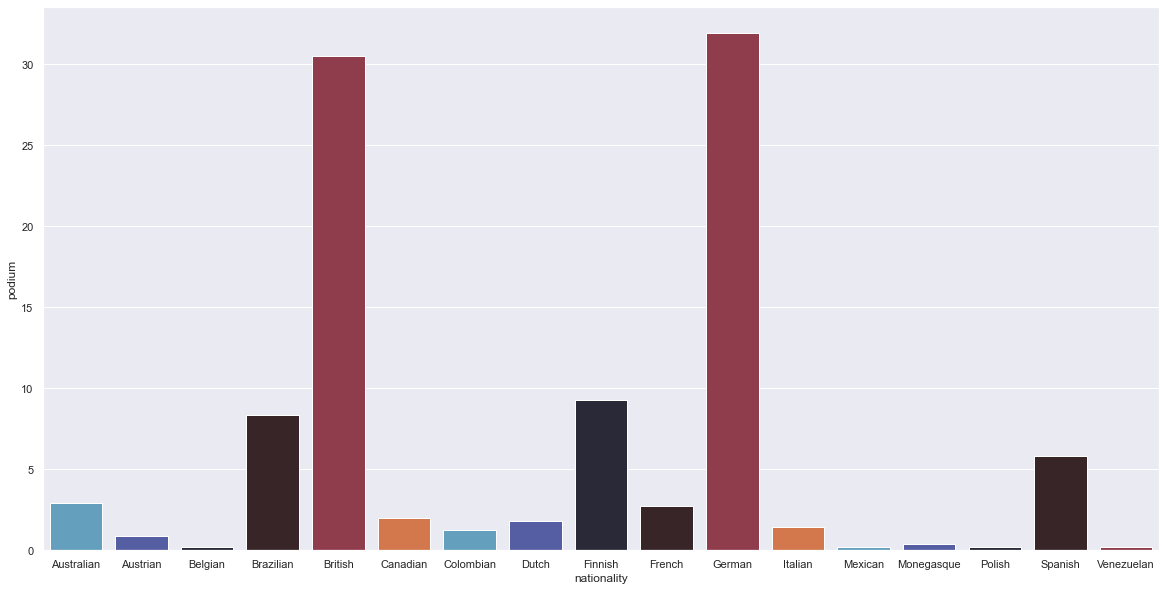

In [26]:
nb_courses=len(results_nationality[results_nationality["podium"]==1])
df=((results_nationality[results_nationality["podium"]==1].groupby("nationality").count())/(nb_courses))*100
df=df.reset_index()
sns.barplot(x='nationality',y='podium',data=df,palette=sns.color_palette("icefire"))

* Observations : Sans surprise, les pilotes les plus titrés sur les grands prix sont de nationalité allemande (Vettel, Schumacher, Rosberg), Anglaise (Hamilton), Brésilienne (Senna) et FInlandaise (Räikkönen) 
* On va ajouter une colonne "nationality" et "country" à notre base

In [27]:
df_country_race=race[["circuit_id","country"]].copy()
df_country_race.head()
results_merged=results.merge(df_country_race ,how='left', on="circuit_id")

In [36]:
print(results_merged)
print(results_merged["nationality"].unique())
print(results_merged["country"].unique())

        season  round  circuit_id   driver date_of_birth nationality  \
0         1990      1     phoenix    senna    1960-03-21   Brazilian   
1         1990      1     phoenix    senna    1960-03-21   Brazilian   
2         1990      1     phoenix    alesi    1964-06-11      French   
3         1990      1     phoenix    alesi    1964-06-11      French   
4         1990      1     phoenix  boutsen    1957-07-13     Belgian   
...        ...    ...         ...      ...           ...         ...   
270245    2020     17  yas_marina    perez    1990-01-26     Mexican   
270246    2020     17  yas_marina    perez    1990-01-26     Mexican   
270247    2020     17  yas_marina    perez    1990-01-26     Mexican   
270248    2020     17  yas_marina    perez    1990-01-26     Mexican   
270249    2020     17  yas_marina    perez    1990-01-26     Mexican   

         constructor  grid        status  points  podium country  
0            mclaren     5      Finished     9.0       1     USA  
1

## 5. Corrélation entre l'âge et les victoires sur les grands prix

In [42]:
results

,season,round,circuit_id,driver,date_of_birth,nationality,constructor,grid,status,points,podium
0,1990,1,phoenix,senna,1960-03-21,Brazilian,mclaren,5,Finished,9.0,1
1,1990,1,phoenix,alesi,1964-06-11,French,tyrrell,4,Finished,6.0,2
2,1990,1,phoenix,boutsen,1957-07-13,Belgian,williams,9,Finished,4.0,3
3,1990,1,phoenix,piquet,1952-08-17,Brazilian,benetton,6,Finished,3.0,4
4,1990,1,phoenix,modena,1963-05-12,Italian,brabham,10,Finished,2.0,5
...,...,...,...,...,...,...,...,...,...,...,...
12392,2020,17,yas_marina,giovinazzi,1993-12-14,Italian,alfa,14,+1 Lap,0.0,16
12393,2020,17,yas_marina,latifi,1995-06-29,Canadian,williams,18,+1 Lap,0.0,17
12394,2020,17,yas_marina,kevin_magnussen,1992-10-05,Danish,haas,20,+1 Lap,0.0,18
12395,2020,17,yas_marina,pietro_fittipaldi,1996-06-25,Brazilian,haas,17,+2 Laps,0.0,19


In [43]:
results_age=results.copy() #on copie la base results dans une nouvelle base qu'on va retravailler

results_age["date_of_birth"]=pd.to_datetime(results_age["date_of_birth"])

results_age["season"]=pd.to_datetime(results_age["season"], format="%Y") # conversion en format date

results_age["age"]=round(((results_age["season"]-results_age['date_of_birth']).dt.days)/365) #On déte

In [47]:
results_age["date_of_birth"]

0       1960-03-21
1       1964-06-11
2       1957-07-13
3       1952-08-17
4       1963-05-12
           ...    
12392   1993-12-14
12393   1995-06-29
12394   1992-10-05
12395   1996-06-25
12396   1990-01-26
Name: date_of_birth, Length: 12397, dtype: datetime64[ns]

In [48]:
results_age["season"]

0       1990-01-01
1       1990-01-01
2       1990-01-01
3       1990-01-01
4       1990-01-01
           ...    
12392   2020-01-01
12393   2020-01-01
12394   2020-01-01
12395   2020-01-01
12396   2020-01-01
Name: season, Length: 12397, dtype: datetime64[ns]

In [49]:
results_age["age"]

0        30.0
1        26.0
2        32.0
3        37.0
4        27.0
         ... 
12392    26.0
12393    25.0
12394    27.0
12395    24.0
12396    30.0
Name: age, Length: 12397, dtype: float64

In [51]:
df=results_age[["age","podium"]]
df_gagnant=df[df["podium"]==1]

sns.histplot(data=df_gagnant, x='age',kde=True) #je trace l'histogramme du nombre de victoire en fonction de l'âge. J'ai du mal à le lire 


corr = df_gagnant.corr()
sns.heatmap(corr,annot=True,vmin=0, vmax=1)# légère corrélation négative avec l'âge, ce n'est pas très significatif 
df_gagnant.head()

AttributeError: module 'seaborn' has no attribute 'histplot'

## 6-Analyse de la météo 

In [8]:
# je trace la correlation entre grid et podium par circuit en 2010, pour les circuits wet. On remarque que cela dépend vraiment des circuits

circuits=results_2010[results_2010["season_x"] ==2010]["circuit_id"].unique()
df=results_2010[results_2010["season_x"] ==2010]
df_dry=df[df["weather_dry"]==1]
les_correlations={}

for circuit in circuits:
    df1=df_dry[df_dry["circuit_id"]==circuit][['grid',"podium"]]
    corr=df1.corr()["podium"][0]
    les_correlations[circuit]=corr
    
df2=pd.DataFrame(list(les_correlations.items()),
                   columns=['circuit_id', 'correlation_grid_pod'])
df2=df2.sort_values(by='correlation_grid_pod',ascending=False)

print(df2)

_,(ax1) = plt.subplots(ncols=1)
sns.barplot(data=df2, x='circuit_id', y='correlation_grid_pod', ax=ax1, palette=sns.color_palette("icefire"))
    
# Les correlations dépendent fortement du type de circuit 

NameError: name 'results_2010' is not defined